In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("fraud loan prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.isnull().sum()
#missing values are there

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
cols = ["Gender","Dependents","Self_Employed","Married"]

df[cols]=df[cols].fillna(df.mode().iloc[0])

In [7]:
cols=["LoanAmount","Loan_Amount_Term","Credit_History"]
df[cols]=df[cols].fillna(df.mean().iloc[0])

In [8]:
df.isnull().sum()
#now no missing values present

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,5403.459283,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [10]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

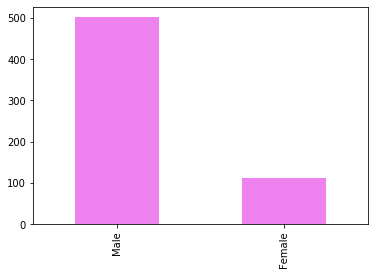

In [11]:
df['Gender'].value_counts().plot.bar(color="violet")

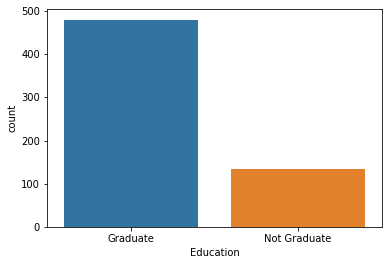

In [12]:
sns.countplot(df['Education'])

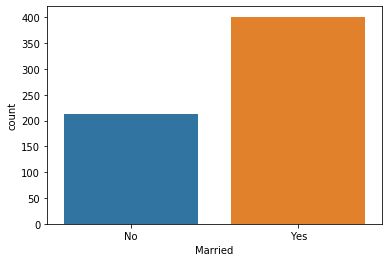

In [13]:
sns.countplot(df['Married'])

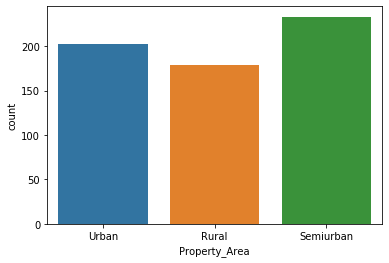

In [14]:
sns.countplot(df['Property_Area'])

Text(0.5, 1.0, 'gender vs loan amount')

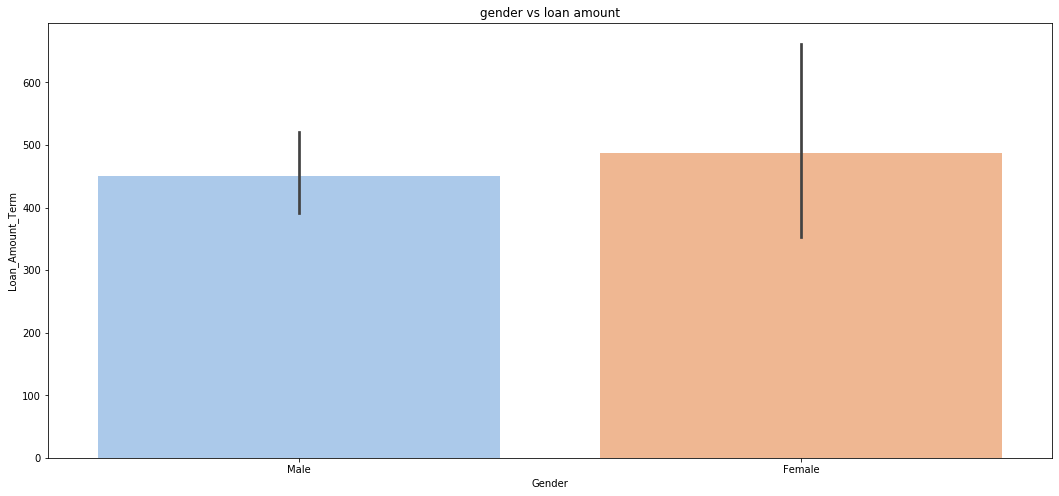

In [15]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'Gender', y = 'Loan_Amount_Term', data = df, palette ='pastel')

plt.title('gender vs loan amount')

Text(0.5, 1.0, 'gender vs loan amount')

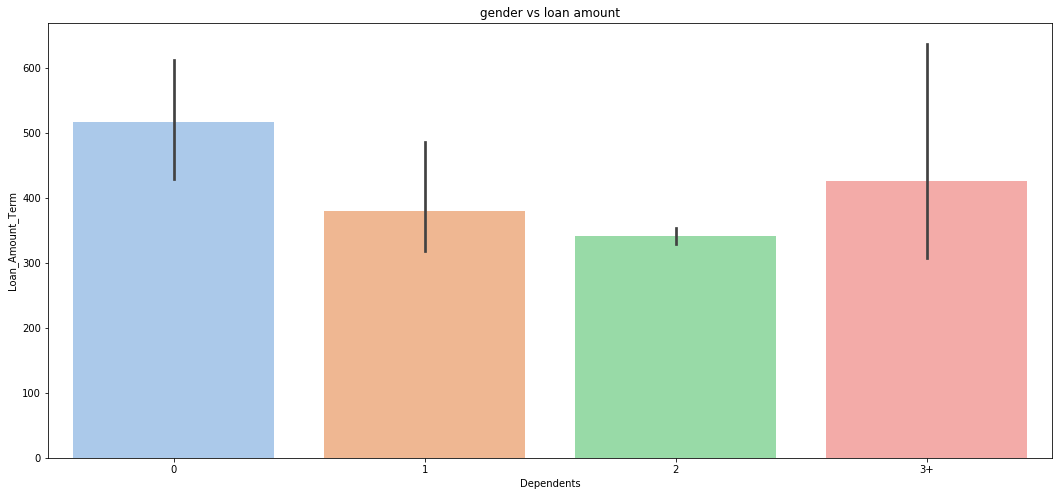

In [16]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'Dependents', y = 'Loan_Amount_Term', data = df, palette ='pastel')

plt.title('gender vs loan amount')
#people with 0 dependent tend to have a  borrow higher loan amount

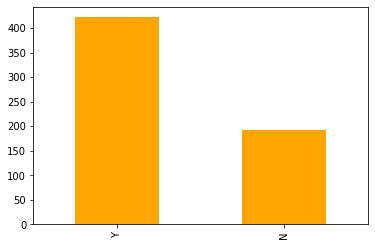

In [17]:
df['Loan_Status'].value_counts().plot.bar(color = 'orange')



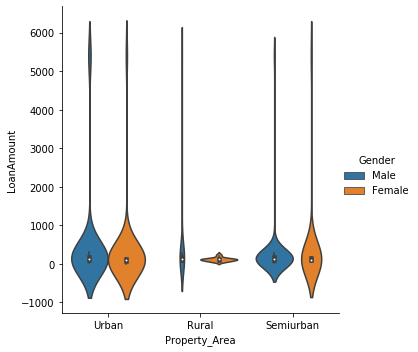

In [18]:
g=sns.catplot(x="Property_Area",y="LoanAmount",hue="Gender",data=df,kind="violin")
plt.show()

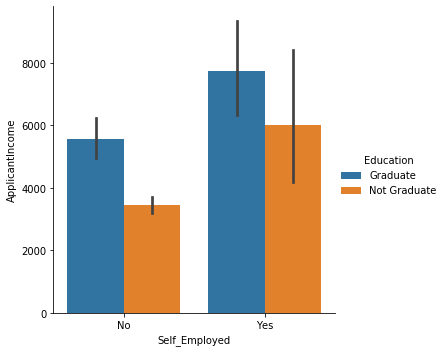

In [19]:
g=sns.catplot(x="Self_Employed",y="ApplicantIncome",hue="Education",data=df,kind="bar")
plt.show()
#among people who are not self employed and have gratuated tend to have a higher income as compared to non graduated same goess with people who are self employed but self employed have a greater income(both gratuated and not graducated)as compared to people who are not self employeed

Text(0.5, 1.0, 'loan status vs credit history')

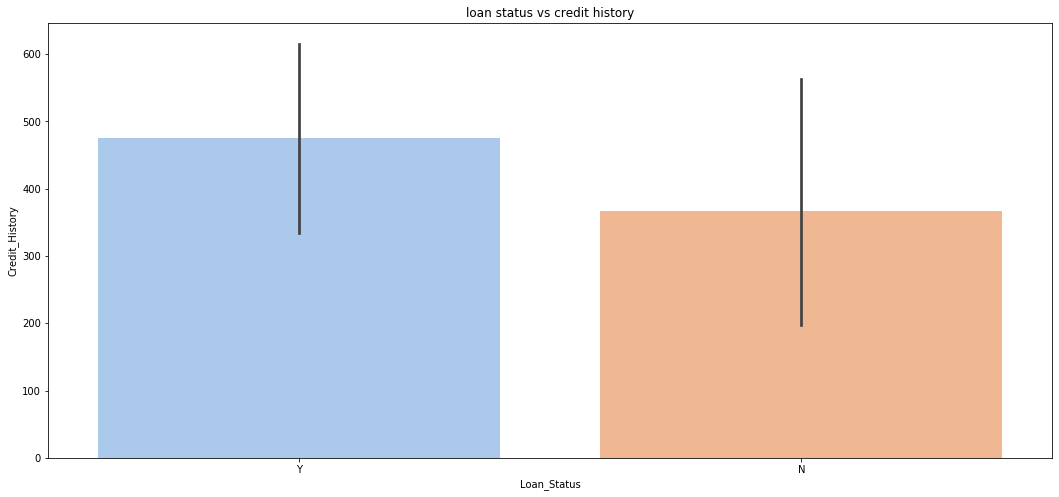

In [20]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'Loan_Status', y = 'Credit_History', data = df, palette ='pastel')

plt.title('loan status vs credit history')
#people who have a good credit history tend to have loan 

{'bodies': [<matplotlib.collections.PolyCollection at 0x26f5abada08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x26f5a88de08>,
 'cmins': <matplotlib.collections.LineCollection at 0x26f5abb6b48>,
 'cbars': <matplotlib.collections.LineCollection at 0x26f5abaddc8>}

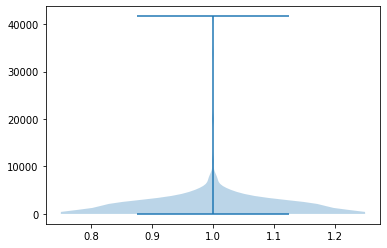

In [21]:
plt.violinplot(df['CoapplicantIncome'])
#coapplicant income mostly is till 10,000

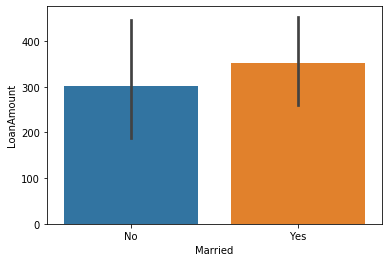

In [22]:
sns.barplot(x="Married",y="LoanAmount",data=df)
plt.show()
#

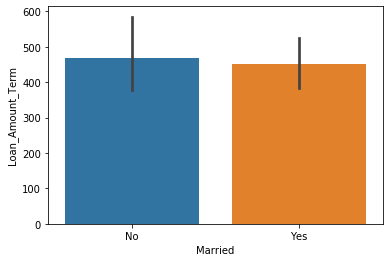

In [23]:
sns.barplot(x="Married",y="Loan_Amount_Term",data=df)
plt.show()

In [24]:
Num_val = {'Female':1, 'Male':0}
df['Gender'] = df['Gender'].apply(lambda x: Num_val[x])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,No,5849,0.0,5403.459283,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [25]:
Num_val = {'Yes':1, 'No':0}
df['Self_Employed'] = df['Self_Employed'].apply(lambda x: Num_val[x])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,0,5849,0.0,5403.459283,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
Num_val = {'No':1, 'Yes':0}
df['Married'] = df['Married'].apply(lambda x: Num_val[x])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,Graduate,0,5849,0.0,5403.459283,360.0,1.0,Urban,Y
1,LP001003,0,0,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,0,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,0,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,1,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [27]:
df['Education']=df['Education'].map({'Graduate':0,
                                    'Not Graduate':1})

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,0,5849,0.0,5403.459283,360.0,1.0,Urban,Y
1,LP001003,0,0,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,0,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,0,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,1,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [29]:
df['Property_Area']=df['Property_Area'].map({'Semiurban':0,
                                    'Urban':1,'Rural':2})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,0,5849,0.0,5403.459283,360.0,1.0,1,Y
1,LP001003,0,0,1,0,0,4583,1508.0,128.000000,360.0,1.0,2,N
2,LP001005,0,0,0,0,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,LP001006,0,0,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,LP001008,0,1,0,0,0,6000,0.0,141.000000,360.0,1.0,1,Y


In [30]:
#lets set up our target variable also
df['Loan_Status']=df['Loan_Status'].map({'N':0,
                                    'Y':1})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,0,5849,0.0,5403.459283,360.0,1.0,1,1
1,LP001003,0,0,1,0,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,LP001005,0,0,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,0,0,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,0,1,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1


In [31]:
df['Dependents']=df['Dependents'].map({'0':0,
                                    '1':1,'3+':2})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0.0,0,0,5849,0.0,5403.459283,360.0,1.0,1,1
1,LP001003,0,0,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,LP001005,0,0,0.0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,0,0,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,0,1,0.0,0,0,6000,0.0,141.000000,360.0,1.0,1,1


In [32]:
#NOW OUR DATA IS READY FOR TRAINING AND TESTING
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.122262,-0.045364,0.000525,-0.058809,-0.082912,-0.032142,0.018803,0.028978,-0.109521,-0.017987
Married,0.364569,1.000000,-0.267604,-0.012304,-0.004489,-0.051708,-0.075948,-0.024189,0.011829,-0.041853,0.007281,-0.091478
Dependents,-0.122262,-0.267604,1.000000,0.052061,0.068188,0.163283,0.023484,0.023753,-0.056944,0.005276,-0.016978,-0.035128
Education,-0.045364,-0.012304,0.052061,1.000000,-0.010383,-0.140760,-0.062290,0.032174,0.070951,0.030083,0.066740,-0.085884
Self_Employed,0.000525,-0.004489,0.068188,-0.010383,1.000000,0.127180,-0.016100,0.011457,0.001285,0.005645,0.007124,-0.003700
ApplicantIncome,-0.058809,-0.051708,0.163283,-0.140760,0.127180,1.000000,-0.116605,0.047713,-0.035559,-0.034654,0.017321,-0.004710
CoapplicantIncome,-0.082912,-0.075948,0.023484,-0.062290,-0.016100,-0.116605,1.000000,-0.021724,0.000674,0.104296,0.019087,-0.059187
LoanAmount,-0.032142,-0.024189,0.023753,0.032174,0.011457,0.047713,-0.021724,1.000000,-0.034605,-0.020906,0.033946,-0.080715
Loan_Amount_Term,0.018803,0.011829,-0.056944,0.070951,0.001285,-0.035559,0.000674,-0.034605,1.000000,-0.046005,0.028313,-0.039820
Credit_History,0.028978,-0.041853,0.005276,0.030083,0.005645,-0.034654,0.104296,-0.020906,-0.046005,1.000000,0.017521,0.033977


In [33]:
#lets drop LOAN_ID


In [34]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [35]:
df.drop(['Dependents'],axis=1,inplace=True)

In [36]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,5849,0.0,5403.459283,360.0,1.0,1,1
1,0,0,0,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,0,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,0,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,0,1,0,0,6000,0.0,141.000000,360.0,1.0,1,1


In [37]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] =['Credit_History'] 
        pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
        return df

In [38]:
df.tail(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,1,0,0,0,12000,0.0,496.000000,360.0,1.0,0,1
605,0,0,1,0,2400,3800.0,5403.459283,180.0,1.0,1,0
606,0,0,0,0,3400,2500.0,173.000000,360.0,1.0,0,1
607,0,0,1,0,3987,1411.0,157.000000,360.0,1.0,2,1
608,0,0,0,0,3232,1950.0,108.000000,360.0,1.0,2,1
609,1,1,0,0,2900,0.0,71.000000,360.0,1.0,2,1
610,0,0,0,0,4106,0.0,40.000000,180.0,1.0,2,1
611,0,0,0,0,8072,240.0,253.000000,360.0,1.0,1,1
612,0,0,0,0,7583,0.0,187.000000,360.0,1.0,1,1
613,1,1,0,1,4583,0.0,133.000000,360.0,0.0,0,0


In [39]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
x = df.iloc[:,4:9]

y= df['Loan_Status']


In [41]:
from sklearn.decomposition import PCA
pca_new = PCA(n_components=5)
x = pca_new.fit_transform(x)

In [42]:
lm = LogisticRegression()

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [44]:
lm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lm = LogisticRegression()
lm.fit(x_train, y_train)
lm_predict = lm.predict(x_test)

In [46]:
lm_conf_matrix = confusion_matrix(y_test, lm_predict)
lm_acc_score = accuracy_score(y_test, lm_predict)
print(lm_conf_matrix)
print(lm_acc_score)

[[ 0 39]
 [ 0 84]]
0.6829268292682927


In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [48]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[15 24]
 [19 65]]
0.6504065040650406


In [49]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
predsvc=svc.predict(x_test)
print('actual and predicted loan status',accuracy_score(y_test,predsvc))

actual and predicted loan status 0.6829268292682927


In [51]:
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

[[ 0 39]
 [ 0 84]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      1.00      0.81        84

    accuracy                           0.68       123
   macro avg       0.34      0.50      0.41       123
weighted avg       0.47      0.68      0.55       123



In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [54]:
predknn

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [55]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.40      0.15      0.22        39
           1       0.69      0.89      0.78        84

    accuracy                           0.66       123
   macro avg       0.55      0.52      0.50       123
weighted avg       0.60      0.66      0.60       123



In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dct=DecisionTreeClassifier()
dct.fit(x_train,y_train)
preddct=dct.predict(x_test)

In [58]:
print(classification_report(y_test,preddct))

              precision    recall  f1-score   support

           0       0.42      0.46      0.44        39
           1       0.74      0.70      0.72        84

    accuracy                           0.63       123
   macro avg       0.58      0.58      0.58       123
weighted avg       0.64      0.63      0.63       123



In [59]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
predgnb=gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))

0.6991869918699187


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print('accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(knn,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score: [0.68253968 0.58730159 0.62295082 0.63934426 0.59016393 0.6557377
 0.60655738 0.59016393 0.67213115 0.63934426]
Mean Scores 0.628623471246422
Standard deviation 0.03309046637989763
Y Prediction values
[0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1
 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 

array([[ 35, 157],
       [ 70, 352]], dtype=int64)

In [62]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=250)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.6422764227642277
[[ 9 30]
 [14 70]]
              precision    recall  f1-score   support

           0       0.39      0.23      0.29        39
           1       0.70      0.83      0.76        84

    accuracy                           0.64       123
   macro avg       0.55      0.53      0.53       123
weighted avg       0.60      0.64      0.61       123



In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(x_train,y_train)
y_pred = tree_clf.predict(x_test)

print("Test Accuracy: ",accuracy_score(y_test,y_pred))

Test Accuracy:  0.6829268292682927


In [64]:
#most of the rejected applicants are being shown accepted
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8174123337363965
Train Accuracy  0.6924643584521385
Validation Mean F1 Score:  0.41158134273458497
Validation Mean Accuracy:  0.6802041028845152


In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [67]:
import time

lm = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lm, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.669381 using {'dual': False, 'max_iter': 100}
Execution time: 4.970735549926758 ms


In [79]:
#lets take only credit history gender married nd education as are features for training to improve accuracy
x = df[['Credit_History','Gender','Married','Education']]
y = df['Loan_Status']

In [80]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x,y)
predictions = model.predict(x)

In [81]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions,y))

0.8127035830618893


In [82]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=250)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.6422764227642277
[[ 9 30]
 [14 70]]
              precision    recall  f1-score   support

           0       0.39      0.23      0.29        39
           1       0.70      0.83      0.76        84

    accuracy                           0.64       123
   macro avg       0.55      0.53      0.53       123
weighted avg       0.60      0.64      0.61       123



In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print('accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(knn,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score: [0.79365079 0.74603175 0.7704918  0.75409836 0.78688525 0.78688525
 0.86885246 0.85245902 0.81967213 0.83606557]
Mean Scores 0.8015092375748113
Standard deviation 0.03928374022961953
Y Prediction values
[1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1
 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 

array([[ 94,  98],
       [ 79, 343]], dtype=int64)

In [89]:
from sklearn.svm import SVC
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(svc,x,y,cv=5)

    print('Mean Scores',score.mean())
    print('Standard deviation',score.std())

    y_pred=cross_val_predict(svc,x,y,cv=5)


    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)


In [90]:
svmkernel('rbf')

Mean Scores 0.8095716552088842
Standard deviation 0.03205615565267281
[[ 82 110]
 [  7 415]]


In [91]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV

parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.8110749185667753
rbf
{'C': 10, 'kernel': 'rbf'}


In [ ]:
#so decision tree and svm gives a good accuracy till now

In [92]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lm = LogisticRegression()
lm.fit(x_train, y_train)
lm_predict = lm.predict(x_test)

In [94]:
y_pred_prob=lm.predict_proba(x_test)[:,1]

In [95]:
y_pred_prob

array([0.71333595, 0.70270114, 0.68584677, 0.68672468, 0.71324359,
       0.71199374, 0.56993557, 0.70422924, 0.67383612, 0.71046156,
       0.70424976, 0.69014972, 0.67177631, 0.60117126, 0.709785  ,
       0.70858647, 0.69282956, 0.70769244, 0.71153315, 0.710193  ,
       0.69629369, 0.54926542, 0.67813487, 0.7055959 , 0.71176744,
       0.78246648, 0.67574591, 0.64296138, 0.69088245, 0.69248589,
       0.70954405, 0.64196815, 0.68177924, 0.70467237, 0.71072972,
       0.68886942, 0.68836349, 0.70992159, 0.68953873, 0.68815585,
       0.59358391, 0.55697631, 0.69612244, 0.66991454, 0.69102948,
       0.70626856, 0.70587322, 0.69601472, 0.62507671, 0.70911471,
       0.69585323, 0.68295793, 0.71229033, 0.68564774, 0.66934396,
       0.7265728 , 0.69121738, 0.70514753, 0.66621935, 0.71144555,
       0.68047004, 0.65970953, 0.69083368, 0.6962521 , 0.69797891,
       0.70979253, 0.67838669, 0.69686242, 0.6649439 , 0.68701021,
       0.68572289, 0.71142181, 0.7107182 , 0.68293667, 0.71255

In [96]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [97]:
fpr

array([0.        , 0.        , 0.        , 0.07692308, 0.07692308,
       0.1025641 , 0.1025641 , 0.12820513, 0.12820513, 0.17948718,
       0.17948718, 0.20512821, 0.20512821, 0.23076923, 0.23076923,
       0.25641026, 0.25641026, 0.30769231, 0.30769231, 0.33333333,
       0.33333333, 0.41025641, 0.41025641, 0.43589744, 0.43589744,
       0.46153846, 0.46153846, 0.48717949, 0.48717949, 0.51282051,
       0.51282051, 0.53846154, 0.53846154, 0.58974359, 0.58974359,
       0.61538462, 0.61538462, 0.64102564, 0.64102564, 0.66666667,
       0.66666667, 0.69230769, 0.69230769, 0.71794872, 0.71794872,
       0.74358974, 0.74358974, 0.76923077, 0.76923077, 0.79487179,
       0.79487179, 0.82051282, 0.82051282, 0.84615385, 0.84615385,
       0.87179487, 0.87179487, 0.8974359 , 0.8974359 , 0.94871795,
       0.94871795, 1.        ])

In [98]:
tpr

array([0.        , 0.01190476, 0.04761905, 0.04761905, 0.05952381,
       0.05952381, 0.07142857, 0.07142857, 0.0952381 , 0.0952381 ,
       0.10714286, 0.10714286, 0.13095238, 0.13095238, 0.14285714,
       0.14285714, 0.1547619 , 0.1547619 , 0.20238095, 0.20238095,
       0.21428571, 0.21428571, 0.23809524, 0.23809524, 0.29761905,
       0.29761905, 0.33333333, 0.33333333, 0.39285714, 0.39285714,
       0.51190476, 0.51190476, 0.57142857, 0.57142857, 0.58333333,
       0.58333333, 0.5952381 , 0.5952381 , 0.61904762, 0.61904762,
       0.73809524, 0.73809524, 0.76190476, 0.76190476, 0.77380952,
       0.77380952, 0.79761905, 0.79761905, 0.80952381, 0.80952381,
       0.88095238, 0.88095238, 0.89285714, 0.89285714, 0.95238095,
       0.95238095, 0.96428571, 0.96428571, 0.97619048, 0.97619048,
       1.        , 1.        ])

In [99]:
thresholds

array([1.78246648, 0.78246648, 0.75369918, 0.71333595, 0.71324359,
       0.71255983, 0.71229033, 0.71199374, 0.71166178, 0.71144555,
       0.71142181, 0.71078209, 0.7107182 , 0.71067212, 0.71064024,
       0.71046156, 0.710193  , 0.70992159, 0.70954405, 0.70919535,
       0.70911471, 0.70819705, 0.70772588, 0.70769244, 0.70514753,
       0.704973  , 0.70424976, 0.70422924, 0.69781695, 0.69686242,
       0.69207503, 0.69121738, 0.68953873, 0.68850814, 0.68836349,
       0.68815585, 0.68784165, 0.68713269, 0.68672468, 0.68584677,
       0.68177924, 0.68047004, 0.6785293 , 0.67838669, 0.67813487,
       0.67774207, 0.67383612, 0.67371448, 0.67177631, 0.67143445,
       0.65970953, 0.65967774, 0.65515889, 0.65100558, 0.63384657,
       0.62507671, 0.62034996, 0.6013699 , 0.60117126, 0.59358391,
       0.56993557, 0.54926542])

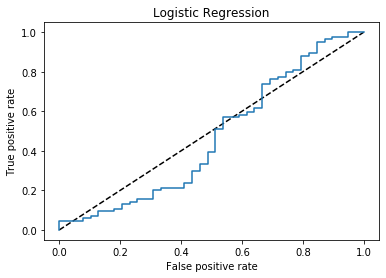

In [100]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
#we can logistic regression is not working well on our dataset

In [106]:
auc_score=roc_auc_score(y_test,lm.predict(x_test))

In [107]:
print(auc_score)

0.5


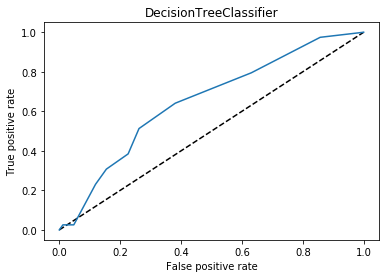

In [101]:
y_pred_prob=rf.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()
#now with decision tree its better

In [104]:
auc_score=roc_auc_score(y_test,dct.predict(x_test))
auc_score

0.5819597069597069

In [108]:
from sklearn.externals import joblib
joblib.dump(dct,'dctfraud.obj')
dct_from_joblib=joblib.load('dctfraud.obj')